In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
max_features = 10000
embedding_dim = 8
epochs = 5
batch_size = 32
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

maxlen: 20, validation accuracy: 0.7408
maxlen: 60, validation accuracy: 0.8037
maxlen: 100, validation accuracy: 0.8338
maxlen: 140, validation accuracy: 0.8503
maxlen: 180, validation accuracy: 0.8580


2025-06-07 23:07:13.231884: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22000000 exceeds 10% of free system memory.
2025-06-07 23:07:15.347876: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22000000 exceeds 10% of free system memory.


maxlen: 220, validation accuracy: 0.8606


2025-06-07 23:07:35.329724: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26000000 exceeds 10% of free system memory.
2025-06-07 23:07:37.178455: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26000000 exceeds 10% of free system memory.


maxlen: 260, validation accuracy: 0.8534


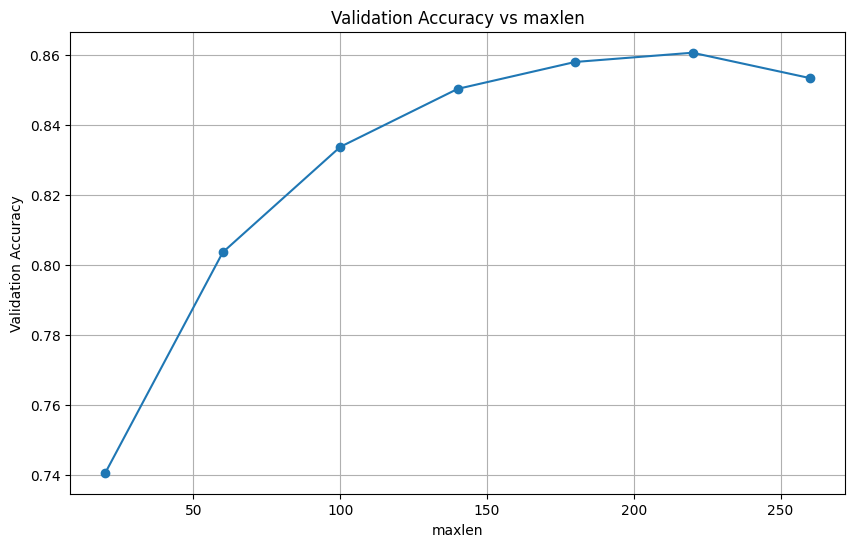

In [6]:
"""
This block of code evaluates the effect of different `maxlen` values (input sequence length) on the validation accuracy of a simple neural network trained on the IMDB sentiment classification dataset.
It uses an Embedding layer followed by Flatten and a Dense layer with sigmoid activation. Validation accuracy is recorded for each maxlen value.
"""
maxlens = [20, 60, 100, 140, 180, 220, 260] # maxlen values
validation_accuracies = []
# Loop over each maxlen value
for maxlen in maxlens:
    x_train_padded = pad_sequences(x_train, maxlen=maxlen)
    x_test_padded = pad_sequences(x_test, maxlen=maxlen)
    model = Sequential()
    model.add(Embedding(max_features, 8, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_data=(x_test_padded, y_test), verbose=0)
    # Get final validation accuracy from training history
    val_acc = history.history['val_accuracy'][-1]
    validation_accuracies.append(val_acc)
    print(f"maxlen: {maxlen}, validation accuracy: {val_acc:.4f}")

plt.figure(figsize=(10,6))
plt.plot(maxlens, validation_accuracies, marker='o')
plt.title("Validation Accuracy vs maxlen")
plt.xlabel("maxlen")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

Units: 8, validation accuracy: 0.8237


Units: 16, validation accuracy: 0.8265
Units: 64, validation accuracy: 0.8050
Units: 128, validation accuracy: 0.8241


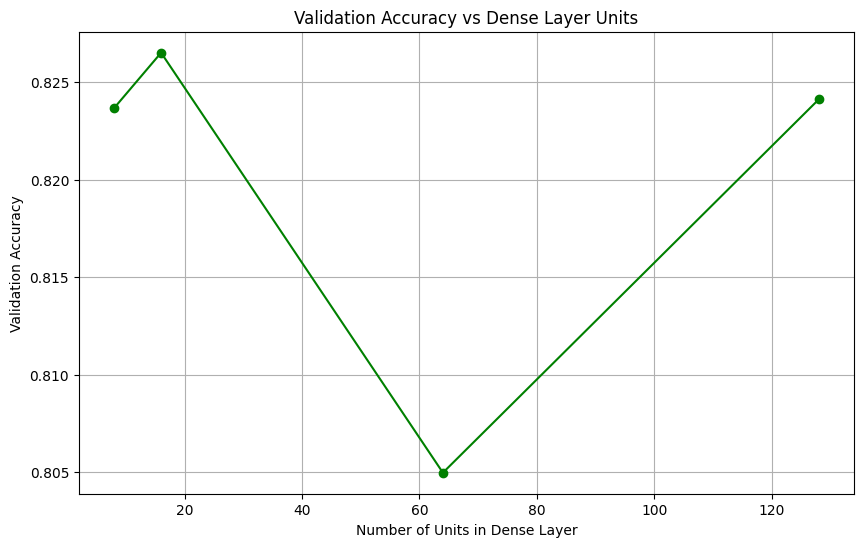

In [7]:
"""
This block of code evaluates how varying the number of units (neurons) in a Dense hidden layer affects the validation accuracy of a sentiment classification model using the IMDB dataset.
The model consists of an Embedding layer, followed by a Flatten layer, one Dense hidden layer (with variable units and ReLU activation), and a final Dense output layer with sigmoid activation.
The best `maxlen` (sequence length) from Task 1 is used as a fixed input length.
"""
num_units_list = [8, 16, 64, 128]
validation_accuracies_layers = []
maxlen = 100  
# Pad input sequences for uniform length
x_train_padded = pad_sequences(x_train, maxlen=maxlen)
x_test_padded = pad_sequences(x_test, maxlen=maxlen)
# Loop over each number of units in the hidden Dense layer
for units in num_units_list:
    model = Sequential()
    model.add(Embedding(max_features, 8, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model with Adam optimizer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_data=(x_test_padded, y_test), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    validation_accuracies_layers.append(val_acc)
    print(f"Units: {units}, validation accuracy: {val_acc:.4f}")
plt.figure(figsize=(10,6))
plt.plot(num_units_list, validation_accuracies_layers, marker='o', color='green')
plt.title("Validation Accuracy vs Dense Layer Units")
plt.xlabel("Number of Units in Dense Layer")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()


Activation: sigmoid, Validation Accuracy: 0.8311
Activation: relu, Validation Accuracy: 0.8280


Activation: tanh, Validation Accuracy: 0.8245
Activation: swish, Validation Accuracy: 0.8111


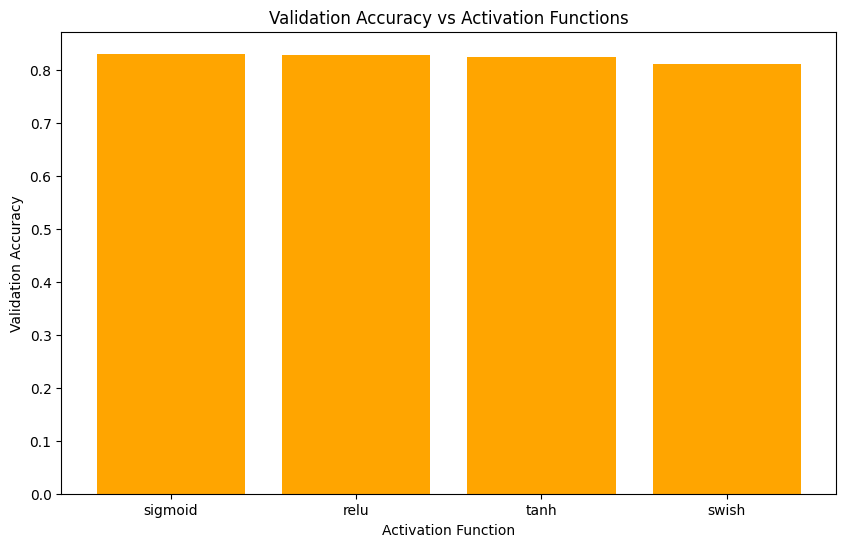

In [8]:
"""
This code block compares the effect of different activation functions(sigmoid, relu, tanh, swish) on the performance of a neural network model for IMDB sentiment classification.
The model uses a fixed maxlen value, and a Dense hidden layer with each activation function is tested one at a time. Swish is used directly from TensorFlow's activation module.
"""
activations = ['sigmoid', 'relu', 'tanh', 'swish']  
from tensorflow.keras.activations import swish  

results = {}
maxlen = 100

x_train_padded = pad_sequences(x_train, maxlen=maxlen)
x_test_padded = pad_sequences(x_test, maxlen=maxlen)

for act in activations:
    model = Sequential()
    model.add(Embedding(max_features, 8, input_length=maxlen))
    model.add(Flatten()) # Flatten output of embedding
    model.add(Dense(16, activation=act if act != 'swish' else swish))
    model.add(Dense(1, activation='sigmoid')) # Output layer with sigmoid for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_data=(x_test_padded, y_test), verbose=0)
    # Record the final validation accuracy
    val_acc = history.history['val_accuracy'][-1]
    results[act] = val_acc
    print(f"Activation: {act}, Validation Accuracy: {val_acc:.4f}")
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='orange')
plt.title("Validation Accuracy vs Activation Functions")
plt.xlabel("Activation Function")
plt.ylabel("Validation Accuracy")
plt.show()
